# Fraud Loan Prediction 
Problem Statement: Whether to give loan to a person or not based on the information provided.

In [1]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Exploratory Data Analysis (EDA)

In [3]:
# Check the dataset shape
df.shape

(614, 13)

In [4]:
# Let us know the information about the dataset and its feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


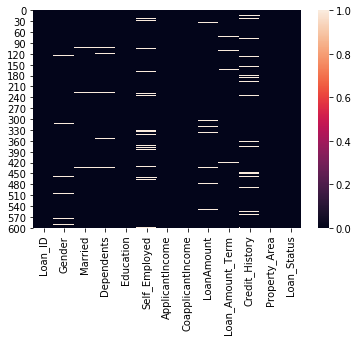

In [5]:
# checking for missing values by plotting a heat map
sns.heatmap(df.isnull())
plt.show()

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Based on the above information we can identify there are many missing values in the dataset 

Missing values are present for Gender, dependents, self_employed, loan amount, loan_amount term, credit history

In [7]:
# We can drop the column LoanID from our dependent features dataset as it will not assist in predicting loan fraud.
df.drop(columns=["Loan_ID"],inplace=True)

# Lets perform EDA

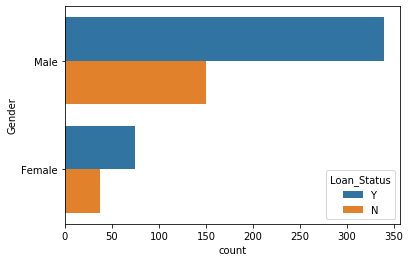

In [8]:
sns.countplot(y='Gender', hue='Loan_Status', data=df)
plt.show()

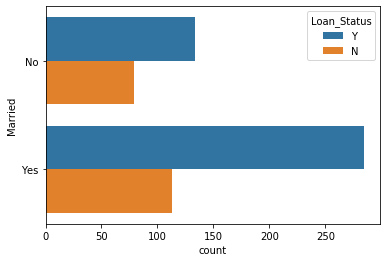

In [9]:
sns.countplot(y='Married', hue='Loan_Status', data=df)
plt.show()

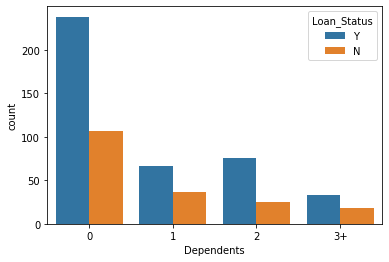

In [10]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.show()

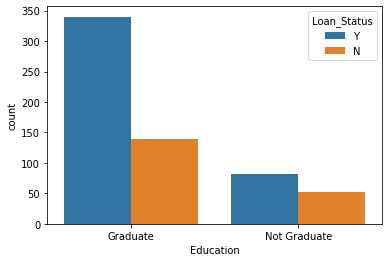

In [11]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


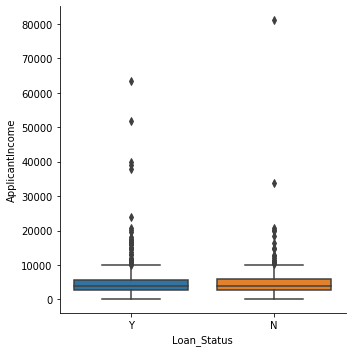

In [13]:
sns.catplot(x='Loan_Status', y='ApplicantIncome',data=df, kind='box')

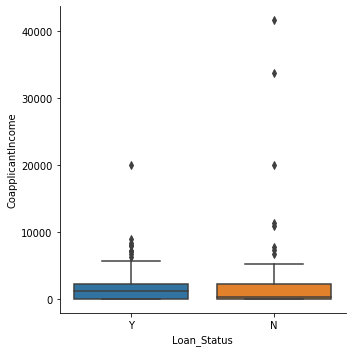

In [14]:
sns.catplot(x='Loan_Status', y='CoapplicantIncome',data=df, kind='box')

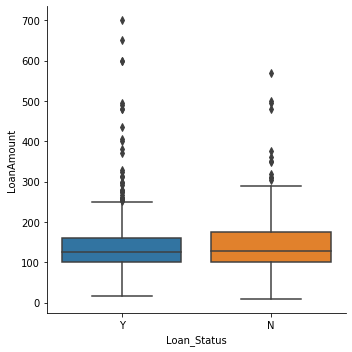

In [15]:
sns.catplot(x='Loan_Status', y='LoanAmount',data=df, kind='box')

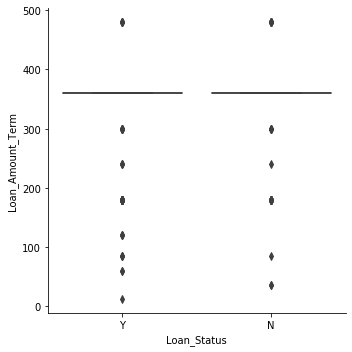

In [16]:
sns.catplot(x='Loan_Status', y='Loan_Amount_Term',data=df, kind='box')

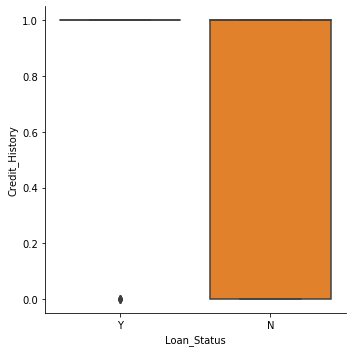

In [17]:
sns.catplot(x='Loan_Status', y='Credit_History',data=df, kind='box')

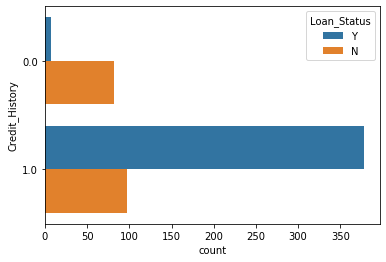

In [18]:
sns.countplot(y='Credit_History', hue='Loan_Status', data=df)
plt.show()

In [19]:
# Based on the above graphical representations it seems more important that we fill in the missing values based on Loan Status
for col in df.columns:
    if df[col].dtype=="object" and df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
    elif df[col].dtype !="object" and df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mean().iloc[0])
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mean().iloc[0])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [21]:
# Let us check the skewness of the data 
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
Loan_Amount_Term    -2.390012
Credit_History      -1.918310
dtype: float64

In [22]:
for col_id in df.skew().index:
    if df.skew().loc[col_id]>0.5:
        df[col_id]=np.log1p(df[col_id])

In [23]:
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Loan_Amount_Term    -2.390012
Credit_History      -1.918310
dtype: float64

In [24]:
# Encoding our target variable
Loan_approval = {"Y": 1, "N": 0}
df['Loan_Status'] = df['Loan_Status'].map(Loan_approval)
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [25]:
# Splitting the data in dependen and independent datasets
X = df.drop(columns=["Loan_Status"])
y = df['Loan_Status']

In [26]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.978762,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,1,0,0,0,0,0,0,0,1


In [27]:
# Feature Scaling  for standardization of numerical features 
from sklearn.preprocessing import StandardScaler

#numeric_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
sc = StandardScaler()

for feature in X.columns:
    X[feature] = sc.fit_transform(X[[feature]])

In [28]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.516186,-1.107783,0.219058,0.279723,0.440239,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,0.137806,0.782158,-0.023164,0.279723,0.440239,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.519479,-1.107783,-1.357210,0.279723,0.440239,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.751605,0.897526,-0.153534,0.279723,0.440239,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.555727,-1.107783,0.172355,0.279723,0.440239,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


In [29]:
#since it is imbalanced dataset so we will focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(classifier,X,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.20,stratify=y)
        classifier.fit(x_train,y_train)
        y_pred = classifier.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    return final_r_state

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc
from sklearn.model_selection import train_test_split, cross_val_score

In [31]:
# For random forest hyper parameter 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(X,y)
clf.best_params_
rf_n_estimators = clf.best_params_['n_estimators']

In [32]:
# KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(X,y)
clf.best_params_
knn_n_neighbors = clf.best_params_['n_neighbors']

In [33]:
# SVC 
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(X,y)
clf.best_params_
c_val = clf.best_params_['C']
kernel_val = clf.best_params_['kernel']

D:\Anaconda2019\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(X,y)
clf.best_params_
gb_learning_rate = clf.best_params_['learning_rate']
gb_n_estimators = clf.best_params_['n_estimators']
print(gb_learning_rate)
print(gb_n_estimators)

D:\Anaconda2019\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.001
1000


In [35]:
LR=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors = knn_n_neighbors)
SVC=SVC(kernel=kernel_val, C=c_val)
DT=DecisionTreeClassifier(random_state=8)
GNB=GaussianNB()
RF=RandomForestClassifier(n_estimators = rf_n_estimators)
GF= GradientBoostingClassifier(learning_rate=gb_learning_rate ,n_estimators=gb_n_estimators)

In [36]:
models = []
models.append(('LogisticRegression', LR))
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SVC))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('Random Forest', RF))
models.append(('GradientBoostingClassifier', GF))

In [37]:
## AUC ROC curve maximization
Model = []
F1_score=[]
Accuracy_score=[]
Precision_score=[]
CVS = []
rocscore = []
max_r_state = []

for name, model in models:
    Model.append(name)
    ml = model
    max_r_state_a = max_aucroc_score(ml,X,y)
    max_r_state.append(max_r_state_a)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=max_r_state_a)
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    F1_score.append(f1_score(y_test,pred))
    Accuracy_score.append(accuracy_score(y_test,pred)*100)
    Precision_score.append(precision_score(y_test,pred)*100)
    sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    CVS.append(sc*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    rocscore.append(roc_auc*100)

In [38]:
resultset=pd.DataFrame({'Model':Model,
                        'F1_score':F1_score,
                        'Accuracy_score': Accuracy_score, 
                        'Precision Score': Precision_score,
                        'Cross_Val_Score': CVS,
                        'ROC_Score':rocscore,
                        'Max Random State':max_r_state,
                       })
resultset

,Model,F1_score,Accuracy_score,Precision Score,Cross_Val_Score,ROC_Score,Max Random State
0,LogisticRegression,0.880435,82.113821,81.000000,82.409576,73.855311,76
1,KNeighborsClassifier,0.833333,73.983740,72.727273,79.300026,62.195122,99
2,SVC,0.788177,65.040650,65.040650,68.732761,50.000000,42
3,DecisionTreeClassifier,0.797619,72.357724,79.761905,73.281291,68.086081,64
4,GaussianNB,0.888889,82.926829,82.352941,82.568306,73.275862,51
5,Random Forest,0.899471,84.552846,83.333333,81.425969,75.239464,51
6,GradientBoostingClassifier,0.885246,82.926829,81.818182,82.399167,75.137363,76


Based on the result set, Finalizing the Gaussian NB model

In [39]:
# Serialization of the model
import joblib
joblib.dump(GNB,'loan_fraud.obj')

['loan_fraud.obj']

In [40]:
model=joblib.load('loan_fraud.obj')

In [41]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)